<a href="https://colab.research.google.com/github/yashb98/90Days_Machine_learinng/blob/main/California_Housing_(ML_Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal : California Housing dataset

The goal of this project is to predict the median house value in California districts based on various features like median income, house age, and location. This is a classic regression problem, where we predict a continuous numerical value


## Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### This first step is the foundation of any data science project. You're importing all the necessary tools and functions into your environment.

1. **numpy and pandas:** These are the workhorses for data manipulation and
numerical operations. pandas is used to work with DataFrames (like spreadsheets in Python), and numpy is for efficient array computations.

2. **sklearn:** This is Scikit-learn, the primary machine learning library in Python. You've imported specific modules for:

3. **Loading the dataset** (fetch_california_housing).

4. **Splitting the data** (train_test_split) and performing hyperparameter tuning (GridSearchCV).

5. **Preprocessing the data** (StandardScaler).

6. **Implementing the different regression models** (LinearRegression, Ridge, etc.).

7. **Evaluating model performance** (mean_squared_error, r2_score).

8. **matplotlib and seaborn:** These are for data visualization, which is crucial for understanding data and model results.



## Step 2: Load the California Housing Dataset

In [4]:
housing = fetch_california_housing(as_frame = True)
df = housing.frame
print(df.head)
print(df.info())

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

#### Here, you load the dataset and perform an initial inspection. This is a critical first look to understand the data's structure, types, and to check for obvious issues like missing values.

1. fetch_california_housing(as_frame=True): This command loads the dataset directly from Scikit-learn and formats it as a pandas DataFrame, which is very convenient.

2. df.head(): Shows the first 5 rows, giving you a feel for the feature values and the target variable (MedHouseVal).

3. df.info(): Provides a concise summary. You can see there are 20,640 entries and 9 columns. Crucially, it shows "Non-Null Count" for all columns is 20,640, meaning there are no missing values to handle. All data types are float64, which is perfect for regression models.

The target variable, MedHouseVal, is the median house value in units of 100,000 dollars. So a value of 4.526 means a median value of 452,600 dollars.

#### This dataset contains:

* Feature(X): 8 Numerical features  (MedInc,
HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)

* Target(y): MedHouseVal - The median house value (in 100,000 USD)

## Step 3: Split Data

In [5]:
X = df.drop("MedHouseVal", axis = 1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### This is one of the most important steps in creating a valid machine learning model. You are splitting your data to simulate a real-world scenario where you would train your model on historical data and then test its performance on new, unseen data.

1. Features (X) and Target (y): You correctly separate the dataset into X (the features or independent variables used to make a prediction) and y (the target or dependent variable you are trying to predict).

2. train_test_split:

    **Why split?** You train the model on the _train data and then evaluate its performance on the _test data. This prevents overfitting, a situation where the model memorizes the training data perfectly but fails to generalize to new data.

3. test_size=0.2: This reserves 20% of your data for the final test set, leaving 80% for training. This is a common and good split ratio.

4. random_state=42: This ensures that the split is reproducible. Every time you run this code, you will get the exact same split, which is essential for consistent results and debugging.

## Step 4: Standardise the Features

Regularization models are sensitive to feature scale - **Always Standardise** your data


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Why Standardise?
Linear models, especially those with regularization (Ridge, Lasso, ElasticNet), are sensitive to the scale of the features. A feature with a large range of values (e.g., Population) might dominate the model's cost function, causing its coefficient to be disproportionately weighted compared to a feature with a small range (e.g., AveRooms). Standardization rescales each feature to have a mean of 0 and a standard deviation of 1, putting all features on a common scale.

1. **fit_transform vs. transform:**

    You use fit_transform(X_train) on the training data. The fit part calculates the mean and standard deviation for each feature in the training set. The transform part then applies this scaling.

    You use only transform(X_test) on the test data. This is crucial! You are applying the scaling parameters learned from the training data to the test data. This prevents data leakage, where information from the test set "leaks" into the training process, giving an overly optimistic evaluation. You must always treat the test set as unseen data.

## Step 5: Train Models

In this step, you train four different linear models. Let's cover the theory first.

**Evaluation Metrics**

1. **R² Score (Coefficient of Determination):** This metric indicates the proportion of the variance in the target variable that is predictable from the features. An R² of 0.57 means your model explains 57% of the variability in house prices. A score of 1.0 is a perfect prediction, while 0.0 means the model is no better than just predicting the average house price.

2. **RMSE (Root Mean Squared Error):** This is the square root of the average of the squared differences between the predicted and actual values. It's a measure of the average magnitude of the error and is in the same units as the target variable. For this dataset, an RMSE of 0.745 means your model's predictions are, on average, off by about $74,500. A lower RMSE is always better.

### 1. Linear Regression

This is the simplest regression model. It finds the optimal coefficients for each feature to fit a straight line (or hyperplane in multiple dimensions) to the data. It does this by minimizing the sum of squared errors (the difference between the predicted and actual values), a method called Ordinary Least Squares (OLS). It's great as a baseline but can be prone to overfitting if you have many features.

In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression: ")
print("R2: ", r2_score(y_test, y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression: 
R2:  0.575787706032451
RMSE:  0.7455813830127763


### 2. Ridge Regression (L2 Regularization)

**Ridge Regression** is an extension of linear regression that adds a regularization term to the cost function. Specifically, it adds the "L2 norm" (sum of the squared coefficients). This penalty term forces the model to keep the coefficients small, which helps to reduce model complexity and prevent overfitting. The alpha parameter controls the strength of this penalty. Ridge shrinks coefficients towards zero but never makes them exactly zero.

In [8]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge= ridge.predict(X_test_scaled)

print("Ridge Regression: ")
print("R2: ", r2_score(y_test, y_pred_ridge))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression: 
R2:  0.5757905180002315
RMSE:  0.7455789118982764


### 3. Lasso Regularization (L1 Regularization)




 **Lasso (Least Absolute Shrinkage and Selection Operator)** is similar to Ridge, but it adds the "L1 norm" (sum of the absolute values of the coefficients) as its penalty. The key difference is that this L1 penalty can shrink some feature coefficients all the way to zero. This makes Lasso incredibly useful for automatic feature selection, as it effectively tells you which features are not important for the prediction.

In [9]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression:")
print("R2: ", r2_score(y_test, y_pred_lasso))
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression:
R2:  0.5768562568705682
RSME:  0.7446417662764214


### 4. Elastic Net (L1 + L2 Regularization)

**Elastic Net** is a hybrid of Ridge and Lasso. It includes both the L1 and L2 penalty terms in its cost function. This is useful because Lasso can sometimes be erratic if features are highly correlated, whereas Ridge handles this better. Elastic Net gives you the best of both worlds: it can perform feature selection like Lasso while handling correlated features robustly like Ridge. The l1_ratio parameter controls the mix between the two penalties.

In [10]:
elastic = ElasticNet(alpha=0.001, l1_ratio=0.9)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("Elastic Net Regression:")
print("R2: ", r2_score(y_test, y_pred_elastic))
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))

Elastic Net Regression:
R2:  0.5767935612793467
RSME:  0.7446969295954571


## Step 6: Hyperparameter Tuning (Grid Search)

We will tune the regularization parameter alpha (and l1_ratio for ElasticNet)

In [11]:
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100 ]}
elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')
elastic_grid = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5, scoring='neg_mean_squared_error')

ridge_grid.fit(X_train_scaled, y_train)
lasso_grid.fit(X_train_scaled, y_train)
elastic_grid.fit(X_train_scaled, y_train)

print("Best Ridge alpha: ", ridge_grid.best_params_)
print("Best Lasso alpha: ", lasso_grid.best_params_)
print("Best ElasticNet parameters: ", elastic_grid.best_params_)


Best Ridge alpha:  {'alpha': 0.1}
Best Lasso alpha:  {'alpha': 0.001}
Best ElasticNet parameters:  {'alpha': 0.001, 'l1_ratio': 0.9}


#### This is a systematic way to find the best settings for your models.

**Hyperparameter Tuning with GridSearchCV**

1. **Hyperparameters:** These are settings you choose before training a model, like alpha in Ridge/Lasso or l1_ratio in ElasticNet. They are not learned from the data like the model's coefficients.

2. **Grid Search:** You define a "grid" of possible hyperparameter values (e.g., alpha: [0.001, 0.01, 1, 100]). GridSearchCV then exhaustively tries every combination.

3. **Cross-Validation (cv=5):** For each combination, it performs 5-fold cross-validation. The training data is split into 5 "folds." The model is trained on 4 folds and validated on the 5th, and this process is repeated 5 times, with each fold being the validation set once. The performance metric is then averaged across the 5 folds. This gives a much more robust performance estimate than a single train/validation split.

4. **scoring='neg_mean_squared_error':** GridSearchCV aims to maximize a score. Since we want to minimize error (like MSE), Scikit-learn uses "negative mean squared error," where a larger number (i.e., closer to zero) is better.

## Step 7: Compare Model Performance

Let's collect the results:


In [12]:
models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_elastic)
]

rmse_score = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic))
]

results = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'RMSE': rmse_score
})

print(results)

        Model  R2 Score      RMSE
0      Linear  0.575788  0.745581
1       Ridge  0.575791  0.745579
2       Lasso  0.576856  0.744642
3  ElasticNet  0.576794  0.744697


## Step 8: Feature Engineering

Let's create some new features that might be helpful for the models:
- `MedInc_HouseAge`: Interaction between median income and house age.
- `AveRooms_AveOccup`: Ratio of average rooms to average occupancy.
- `Distance_from_center`: A measure of distance from a central point (can be calculated based on latitude and longitude).

In [19]:
# Calculate the center of the data based on latitude and longitude
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

# Function to calculate distance from the center
def distance_from_center(row):
    return np.sqrt((row['Latitude'] - center_lat)**2 + (row['Longitude'] - center_lon)**2)

# Apply feature engineering to both training and test sets
X_train_engineered = X_train.copy()
X_test_engineered = X_test.copy()

X_train_engineered['MedInc_HouseAge'] = X_train_engineered['MedInc'] * X_train_engineered['HouseAge']
X_test_engineered['MedInc_HouseAge'] = X_test_engineered['MedInc'] * X_test_engineered['HouseAge']

X_train_engineered['AveRooms_AveOccup'] = X_train_engineered['AveRooms'] / X_train_engineered['AveOccup']
X_test_engineered['AveRooms_AveOccup'] = X_test_engineered['AveRooms'] / X_test_engineered['AveOccup']

X_train_engineered['Distance_from_center'] = X_train_engineered.apply(distance_from_center, axis=1)
X_test_engineered['Distance_from_center'] = X_test_engineered.apply(distance_from_center, axis=1)

display(X_train_engineered.head())
display(X_test_engineered.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_HouseAge,AveRooms_AveOccup,Distance_from_center
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,107.5668,1.359130,3.871353
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,186.8125,2.573820,2.335336
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,16.6252,2.073224,1.331598
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,69.9300,1.002116,3.834670
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,152.8306,2.725400,1.171007


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_HouseAge,AveRooms_AveOccup,Distance_from_center
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,42.0300,1.081178,0.704678
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,75.9390,1.880511,0.503947
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,180.9652,2.923664,3.597141
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,97.5392,1.789443,1.596724
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,126.6500,2.211665,2.558791


#### This is an excellent demonstration of how to improve model performance beyond just tuning. Feature engineering is often the most impactful part of a project.

#### **Feature Engineering**
This is the art and science of creating new, more informative features from the existing data. A good engineered feature can capture a complex relationship that the model might otherwise miss.

Your New Features:

**MedInc_HouseAge:** An interaction term. This could capture the idea that the effect of income on house price might differ depending on the age of the housing stock in the area.

**AveRooms_AveOccup:** A ratio. This might be a better proxy for spaciousness than either feature alone. A high number of rooms with low occupancy might indicate a more desirable, larger home.

**Distance_from_center:** A spatial feature. This is a great idea, as house prices are often strongly correlated with location and proximity to major city centers.


By creating these features, you are explicitly giving the model information that was only implicitly present in the original data.

## Step 9: Standardise Engineered Features

We need to standardise the newly engineered features as regularization models are sensitive to feature scale.

In [20]:
scaler_engineered = StandardScaler()
X_train_engineered_scaled = scaler_engineered.fit_transform(X_train_engineered)
X_test_engineered_scaled = scaler_engineered.transform(X_test_engineered)

## Step 10: Train Models with Engineered Features

### 1. Linear Regression with Engineered Features

In [21]:
lr_engineered = LinearRegression()
lr_engineered.fit(X_train_engineered_scaled, y_train)

y_pred_lr_engineered = lr_engineered.predict(X_test_engineered_scaled)

print("Linear Regression with Engineered Features: ")
print("R2: ", r2_score(y_test, y_pred_lr_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lr_engineered)))

Linear Regression with Engineered Features: 
R2:  0.6394692631290806
RMSE:  0.6873446839304572


### 2. Ridge Regression (L2 Regularization) with Engineered Features

In [22]:
ridge_engineered = Ridge(alpha=0.1) # Using the best alpha found earlier
ridge_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_ridge_engineered = ridge_engineered.predict(X_test_engineered_scaled)

print("Ridge Regression with Engineered Features: ")
print("R2: ", r2_score(y_test, y_pred_ridge_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge_engineered)))

Ridge Regression with Engineered Features: 
R2:  0.6394690712626954
RMSE:  0.6873448668251577


### 3. Lasso Regularization (L1 Regularization) with Engineered Features

In [23]:
lasso_engineered = Lasso(alpha=0.001) # Using the best alpha found earlier
lasso_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_lasso_engineered = lasso_engineered.predict(X_test_engineered_scaled)

print("Lasso Regression with Engineered Features:")
print("R2: ", r2_score(y_test, y_pred_lasso_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso_engineered)))

Lasso Regression with Engineered Features:
R2:  0.6396187283306781
RMSE:  0.6872021929427701


### 4. Elastic Net (L1 + L2 Regularization) with Engineered Features

In [24]:
elastic_engineered = ElasticNet(alpha=0.001, l1_ratio=0.9) # Using the best parameters found earlier
elastic_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_elastic_engineered = elastic_engineered.predict(X_test_engineered_scaled)

print("Elastic Net Regression with Engineered Features:")
print("R2: ", r2_score(y_test, y_pred_elastic_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_elastic_engineered)))

Elastic Net Regression with Engineered Features:
R2:  0.6395997558310369
RMSE:  0.6872202818014189


## Step 11: Compare Model Performance with and without Engineered Features

In [25]:
models_engineered = ['Linear (Engineered)', 'Ridge (Engineered)', 'Lasso (Engineered)', 'ElasticNet (Engineered)']
r2_scores_engineered = [
    r2_score(y_test, y_pred_lr_engineered),
    r2_score(y_test, y_pred_ridge_engineered),
    r2_score(y_test, y_pred_lasso_engineered),
    r2_score(y_test, y_pred_elastic_engineered)
]

rmse_scores_engineered = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr_engineered)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge_engineered)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso_engineered)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic_engineered))
]

results_engineered = pd.DataFrame({
    'Model': models_engineered,
    'R2 Score': r2_scores_engineered,
    'RMSE': rmse_scores_engineered
})

# Combine the results DataFrames for easier comparison
combined_results = pd.concat([results, results_engineered])

print("Model Performance Comparison (with and without Engineered Features):")
display(combined_results)

Model Performance Comparison (with and without Engineered Features):


,Model,R2 Score,RMSE
0,Linear,0.575788,0.745581
1,Ridge,0.575791,0.745579
2,Lasso,0.576856,0.744642
3,ElasticNet,0.576794,0.744697
0,Linear (Engineered),0.639469,0.687345
1,Ridge (Engineered),0.639469,0.687345
2,Lasso (Engineered),0.639619,0.687202
3,ElasticNet (Engineered),0.639600,0.687220


## Step 12: Visualize Model Performance Comparison

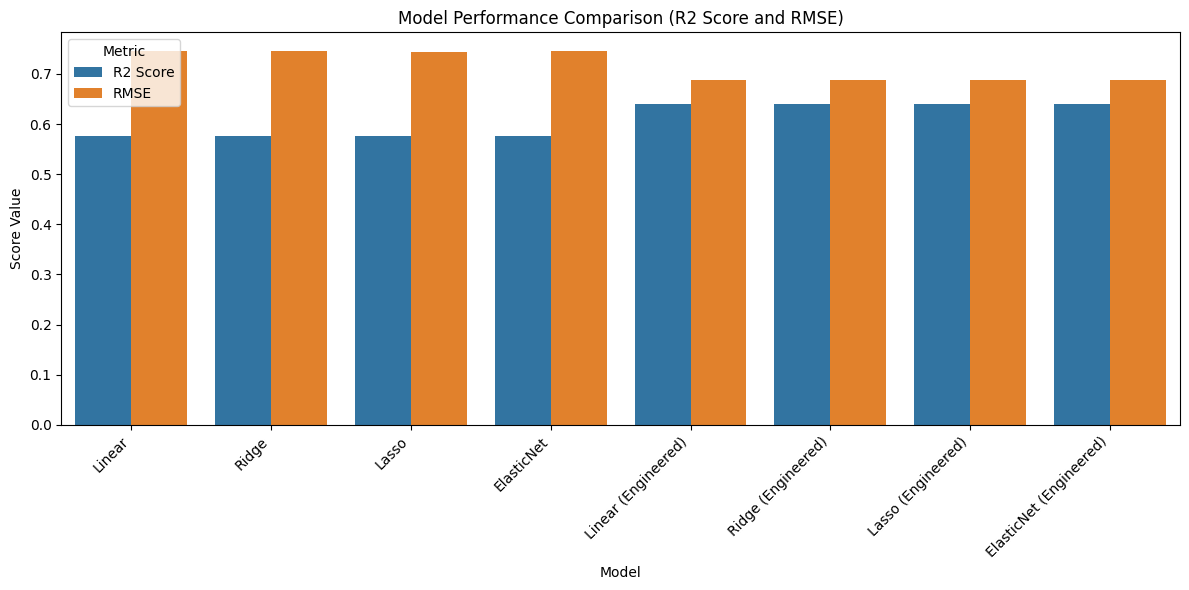

In [33]:
# The data for grouped bar plot
combined_results_melted = combined_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=combined_results_melted)
plt.title('Model Performance Comparison (R2 Score and RMSE)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score Value')
plt.tight_layout()
plt.show()

The final results table and the visualization tell a very clear story.

####**Analysis:**
After adding the three engineered features, the performance of all models improved significantly.

 The **R² Score** jumped from **~0.57 to ~0.64**. This means your new models explain an additional **7%** of the variance in **house prices**, which is a **substantial improvement**.

The **RMSE** dropped from **~0.745 to ~0.687**. This means the average prediction error decreased from about 74,500 dollars to about 68,700 dollars.

####**Conclusion:**
  This powerfully demonstrates that thoughtful feature engineering is often more effective than just choosing a complex model or extensive hyperparameter tuning. The bar chart makes this conclusion immediately obvious. The "Engineered" models are in a different class of performance compared to the originals. The Lasso model with engineered features is your overall best performer.